<a href="https://colab.research.google.com/github/BlackBoyZeus/computervision-S-/blob/main/Image_Segmentation_with_UNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Segmentation with UNet


In [1]:
# prompt: import and mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


This guide covers learning end-to-end Image Segmentation with Keras and Tensorflow.

When the guide is completed, it will be able to develop Image Segmentation algorithms with U-Net architecture.

- E-mail: rem.imanjefferson@gmail.com
- Github: https://github.com/BlackBoyZeus
- Linkedin: https://www.linkedin.com/in/boypotus/

![picture](https://nanonets.com/blog/content/images/2018/11/1_rZ1vDrOBWqISFiNL5OMEbg.jpeg)

# Contents

  1.   Semantic Segmentation
  2.   UNet
  3.   Binary Segmentation
  4.   Multi-Class Segmentation

# 1. Semantic Segmentation
***Semantic Segmentation*** or ***Image Segmentation*** is a deep learning algorithm that associates each pixel in an image with a tag or category. For example, an autonomous vehicle; must identify vehicles, pedestrians, traffic signs, sidewalks, and other road features. All these processes can be performed using the image segmentation technique.

The application areas are:
- Autonomous Driving
- Industrial Application
- Satellite Images
- Medical Imaging
- Robotics

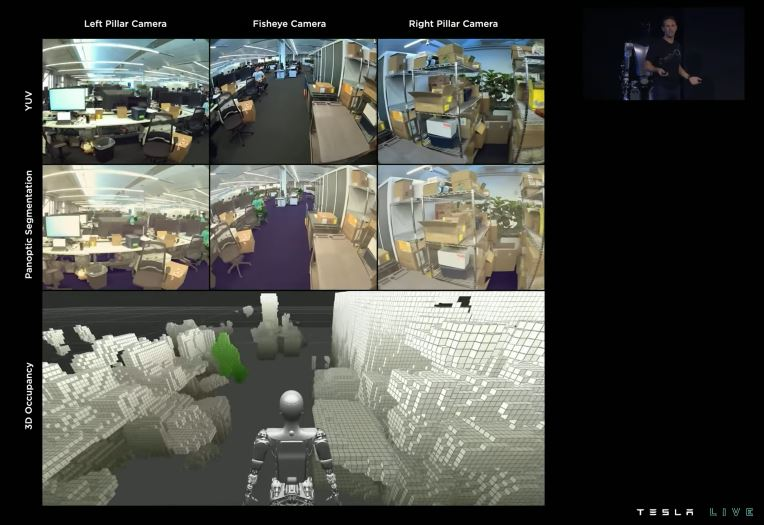

https://www.youtube.com/watch?v=ODSJsviD_SU (min 47.27)

# 2. UNet


U-Net is a convolutional neural network developed by researchers at the University of Freiburg for segmentation biomedical images.

![picture](https://gholste.me/publication/holste-spie-2020/featured_hu005251c37a4f49559965411aa987786b_649805_720x0_resize_lanczos_2.png)

The network architecture is based on the fully convolutional network and has been modified and expanded to work with fewer training images and provide more precise segmentations. Also, this network is so fast that it takes less than 1 second on the GPU to segment a 512x512 image. (https://en.wikipedia.org/wiki/U-Net)

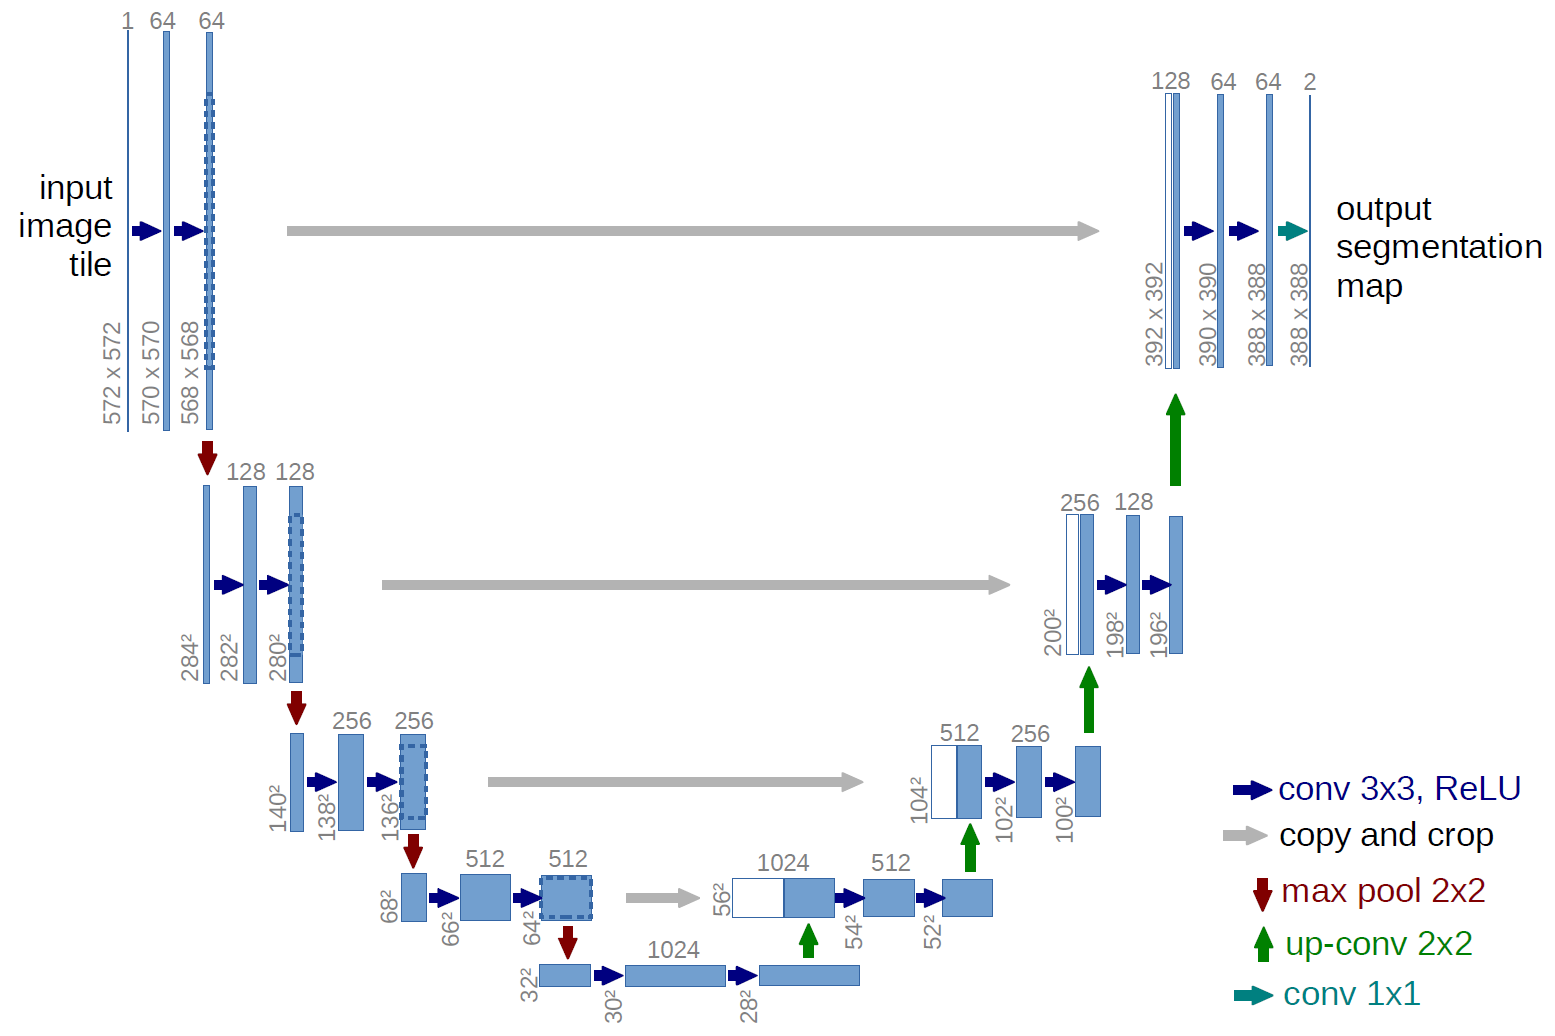

UNet architecture consists of 3 parts:
- Encoder
- Decoder
- Skip Connection

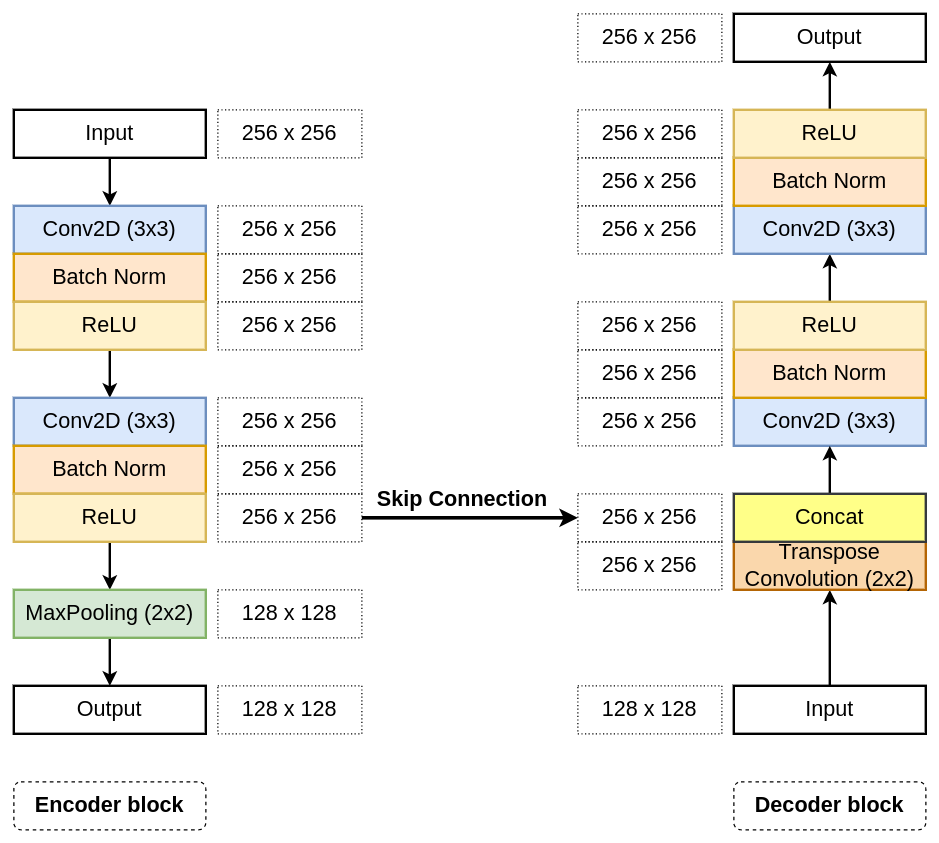

- Let's examine the simplified version of UNet architecture and start coding with Keras.

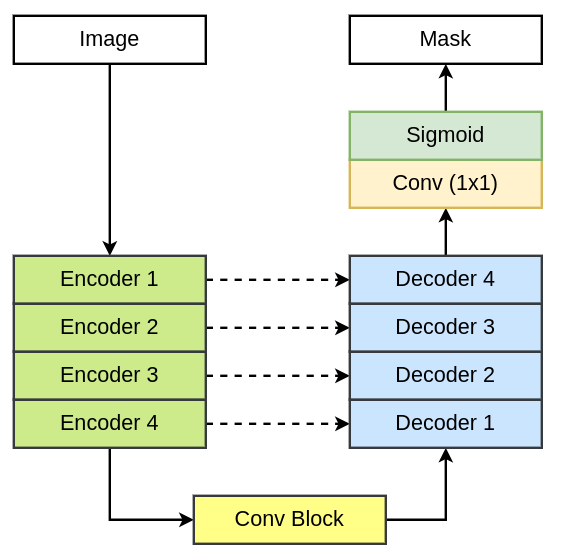

In [2]:
# import libraries
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input

In [3]:
# convolution block
def conv_block(inputs, num_filters):
  x = Conv2D(num_filters, 3, padding="same")(inputs)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)

  x = Conv2D(num_filters, 3, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)

  return x

In [4]:
#encoder block
def encoder_block(inputs, num_filters):
  x = conv_block(inputs, num_filters)
  p = MaxPool2D((2,2))(x)

  return x, p

In [5]:
#decoder block
def decoder_block(inputs, skip ,num_filters):
  x = Conv2DTranspose(num_filters, (2,2), strides=2, padding="same")(inputs)
  x = Concatenate()([x, skip])
  x = conv_block(x, num_filters)

  return x

In [6]:
# unet
def build_unet(input_shape):
  inputs = Input(input_shape)

  # encoder blocks
  s1, p1 = encoder_block(inputs, 64)
  s2, p2 = encoder_block(p1, 128)
  s3, p3 = encoder_block(p2, 256)
  s4, p4 = encoder_block(p3, 512)

  # bridge
  b1 = conv_block(p4, 1024)

  # decoder
  d1 = decoder_block(b1, s4, 512)
  d2 = decoder_block(d1, s3, 256)
  d3 = decoder_block(d2, s2, 128)
  d4 = decoder_block(d3, s1, 64)

  outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

  model = Model(inputs, outputs, name="UNET")

  return model

In [7]:
input_shape = (256,256,3)
model = build_unet(input_shape)

In [8]:
model.summary()

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                              

# 3. Binary Segmentation


Binary Semantic Segmentation is the process of separating the pixels of an image into two categories. Pixels of foreground objects of an image and pixels of background objects of an image.

Image segmentation is a major challenge in image processing and computer vision in many applications, from background subtraction to object tracking.

![picture](https://camo.githubusercontent.com/773d2b494242e988b627634f016969c990f80289fd385c86e958c952a8f7775e/68747470733a2f2f686162726173746f726167652e6f72672f776562742f62632f65672f67382f6263656767387a6467642d636f2d6c69703668786e3937366a646d2e6a706567)

In this example, we will perform segmentation on mitochondria in images examined with a microscope. To download the dataset, you can use the link below or the Google Drive link that I shared with you in the course materials:
- https://www.epfl.ch/labs/cvlab/data/data-em/

After downloading the dataset, upload it to Google Drive.

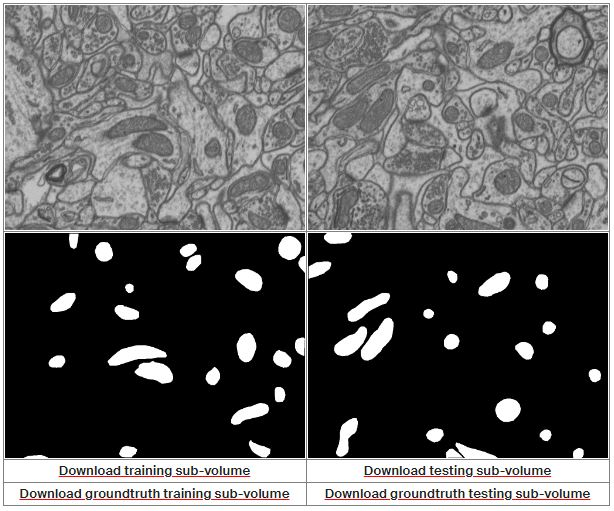

In [11]:
%cd /content/drive/MyDrive/UNET27

/content/drive/MyDrive/UNET27


In [12]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/test/
   creating: dataset/test/data/
  inflating: dataset/test/data/test0.tif  
  inflating: dataset/test/data/test1.tif  
  inflating: dataset/test/data/test10.tif  
  inflating: dataset/test/data/test100.tif  
  inflating: dataset/test/data/test101.tif  
  inflating: dataset/test/data/test102.tif  
  inflating: dataset/test/data/test103.tif  
  inflating: dataset/test/data/test104.tif  
  inflating: dataset/test/data/test105.tif  
  inflating: dataset/test/data/test106.tif  
  inflating: dataset/test/data/test107.tif  
  inflating: dataset/test/data/test108.tif  
  inflating: dataset/test/data/test109.tif  
  inflating: dataset/test/data/test11.tif  
  inflating: dataset/test/data/test110.tif  
  inflating: dataset/test/data/test111.tif  
  inflating: dataset/test/data/test112.tif  
  inflating: dataset/test/data/test113.tif  
  inflating: dataset/test/data/test114.tif  
  inflating: dataset/test/data/test115.tif  
  inflating: dataset/test

In [13]:
# importing libraries
import os
import cv2
import glob
import random

import numpy as np
from PIL import Image
from keras.optimizers import Adam

from matplotlib import pyplot as plt
from tensorflow.keras.utils import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input

Görüntüleri Hazırlama

In [94]:
# define path for masks and images
image_directory = "/content/drive/MyDrive/UNET27/unet/Images/train"
mask_directory = "/content/drive/MyDrive/UNET27/unet/Masks/train"

SIZE = 256

In [95]:
image_data = []
mask_data = []

images = os.listdir(image_directory)
masks = os.listdir(mask_directory)

print(images)
print(masks)

['chunk_7200_7200_jpg.rf.079862059c5959f8a49572bdc5b63df7.jpg', 'rbt_800_7200_jpg.rf.283543bc7718eef523a8f1eae5af476a.jpg', 'kech_53600_28000_jpg.rf.0b40727697e09c9072e05d1dd61ccb61.jpg', 'kech_18400_24000_jpg.rf.1d9ffce70171e590dbf21afdc2abeff6.jpg', 'ken_5600_3200_jpg.rf.0736e76af8408e1b800831494fe96749.jpg', 'ag_2400_0_jpg.rf.0628b7f3234ce08a8dfaa370d4f7808f.jpg', 'kech_48000_24000_jpg.rf.034ead22dc527937da4177248e2312f6.jpg', 'kech_53600_30400_jpg.rf.16e5edaa12c74aa8bb8e96e647a0476d.jpg', 'kech_39200_9600_jpg.rf.06abaf8b50b0481a319e7bfef37aa022.jpg', 'kech_50400_15200_jpg.rf.012dded652c22a7807374fff5e75baa7.jpg', 'kech_39200_9600_jpg.rf.069ad0fb41f12c1c57ac25d759bfc233.jpg', 'kech_48800_24000_jpg.rf.180327e335a688325b31ad00f9d7247c.jpg', 'chunk_1600_4800_jpg.rf.0949db72b4144fe4605496aae7e35818.jpg', 'nado_4000_800_jpg.rf.0cd20217bb6f1d276babdb570f698ab2.jpg', 'kech_54400_26400_jpg.rf.12f2c0a5d2c353384533c68b77d45911.jpg', 'rbt_800_7200_jpg.rf.1d4766744312bb9d311da9feecaab9f6.jpg', 

In [117]:

# Process images
for i, image_name in enumerate(images):
    if image_name.split(".")[-1].lower() == "jpg":
        path = os.path.join(image_directory, image_name)
        image = cv2.imread(path, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        image_data.append(np.array(image))

        # Print progress
        print(f"Processed {i + 1} out of {len(images)} images.")

# Now all the images with ".jpg" extension are processed and stored in image_data list.

Processed 1 out of 204 images.
Processed 2 out of 204 images.
Processed 3 out of 204 images.
Processed 4 out of 204 images.
Processed 5 out of 204 images.
Processed 6 out of 204 images.
Processed 7 out of 204 images.
Processed 8 out of 204 images.
Processed 9 out of 204 images.
Processed 10 out of 204 images.
Processed 11 out of 204 images.
Processed 12 out of 204 images.
Processed 13 out of 204 images.
Processed 14 out of 204 images.
Processed 15 out of 204 images.
Processed 16 out of 204 images.
Processed 17 out of 204 images.
Processed 18 out of 204 images.
Processed 19 out of 204 images.
Processed 20 out of 204 images.
Processed 21 out of 204 images.
Processed 22 out of 204 images.
Processed 23 out of 204 images.
Processed 24 out of 204 images.
Processed 25 out of 204 images.
Processed 26 out of 204 images.
Processed 27 out of 204 images.
Processed 28 out of 204 images.
Processed 29 out of 204 images.
Processed 30 out of 204 images.
Processed 31 out of 204 images.
Processed 32 out 

In [115]:

# Process masks
for i, image_name in enumerate(masks):
    if image_name.split(".")[-1].lower() == "png":
        path_mask = os.path.join(mask_directory, image_name)
        image = cv2.imread(path_mask, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        mask_data.append(np.array(image))

        # Print progress
        print(f"Processed {i + 1} out of {len(masks)} masks.")

# Now all the masks with ".png" extension are processed and stored in mask_data list.

Processed 1 out of 407 masks.
Processed 6 out of 407 masks.
Processed 13 out of 407 masks.
Processed 15 out of 407 masks.
Processed 17 out of 407 masks.
Processed 18 out of 407 masks.
Processed 22 out of 407 masks.
Processed 23 out of 407 masks.
Processed 24 out of 407 masks.
Processed 26 out of 407 masks.
Processed 27 out of 407 masks.
Processed 28 out of 407 masks.
Processed 31 out of 407 masks.
Processed 34 out of 407 masks.
Processed 35 out of 407 masks.
Processed 36 out of 407 masks.
Processed 37 out of 407 masks.
Processed 39 out of 407 masks.
Processed 41 out of 407 masks.
Processed 43 out of 407 masks.
Processed 44 out of 407 masks.
Processed 47 out of 407 masks.
Processed 52 out of 407 masks.
Processed 53 out of 407 masks.
Processed 54 out of 407 masks.
Processed 55 out of 407 masks.
Processed 56 out of 407 masks.
Processed 57 out of 407 masks.
Processed 58 out of 407 masks.
Processed 60 out of 407 masks.
Processed 62 out of 407 masks.
Processed 64 out of 407 masks.
Processed 

In [118]:
print(len(image_data))
print(len(mask_data))

203
203


In [120]:
# normalize images
image_data = np.expand_dims(normalize(np.array(image_data),axis=1),3)
print(image_data.shape)

(203, 256, 256, 1, 1)


In [121]:
# normalize masks
mask_data = np.expand_dims(np.array(mask_data),3) / 255.
print(mask_data.shape)

(203, 256, 256, 1)


In [122]:
X_train, X_val, y_train, y_val = train_test_split(image_data, mask_data,
                                                  test_size=0.10, random_state=0)

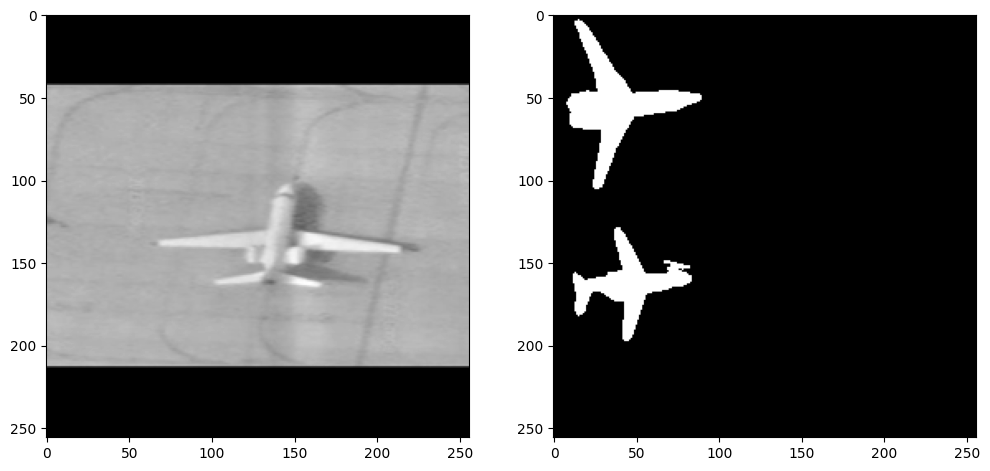

In [123]:
image_number = random.randint(0, len(X_train))

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (256,256)),cmap="gray")

plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (256,256)),cmap="gray")

plt.show()

Model

In [124]:
# convolution block
def conv_block(inputs, num_filters):
  x = Conv2D(num_filters, 3, padding="same")(inputs)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)

  x = Conv2D(num_filters, 3, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)

  return x

In [125]:
#encoder block
def encoder_block(inputs, num_filters):
  x = conv_block(inputs, num_filters)
  p = MaxPool2D((2,2))(x)

  return x, p

In [126]:
#decoder block
def decoder_block(inputs, skip, num_filters):
  x = Conv2DTranspose(num_filters, (2,2), strides=2, padding="same")(inputs)
  x = Concatenate()([x, skip])
  x = conv_block(x, num_filters)
  return x

In [127]:
# unet
def build_unet(input_shape):
  inputs = Input(input_shape)

  # Encoder
  s1, p1 = encoder_block(inputs, 64)
  s2, p2 = encoder_block(p1, 128)
  s3, p3 = encoder_block(p2, 256)
  s4, p4 = encoder_block(p3, 512)

  # Bridge
  b1 = conv_block(p4, 1024)

  # Decoder
  d1 = decoder_block(b1, s4, 512)
  d2 = decoder_block(d1, s3, 256)
  d3 = decoder_block(d2, s2, 128)
  d4 = decoder_block(d3, s1, 64)

  outputs = Conv2D(1, 1, padding = "same", activation = "sigmoid")(d4)

  model = Model(inputs, outputs, name="UNET")
  return model

In [128]:
input_shape = (256,256,1)
model = build_unet(input_shape)

In [129]:
model.summary()

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_57 (Conv2D)             (None, 256, 256, 64  640         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_54 (BatchN  (None, 256, 256, 64  256        ['conv2d_57[0][0]']              
 ormalization)                  )                                                              

In [130]:
model.compile(optimizer = Adam(learning_rate=1e-3), loss="binary_crossentropy",
              metrics = ["accuracy"])

Eğitim (Training)

In [131]:
history = model.fit(X_train,
                    y_train,
                    batch_size=16,
                    verbose = 1,
                    epochs = 100,
                    validation_data=(X_val, y_val),
                    shuffle=False)

Epoch 1/100
12/12 [==============================] - 31s 2s/step - loss: 0.4113 - accuracy: 0.8897 - val_loss: 67.9074 - val_accuracy: 0.2199
Epoch 2/100
12/12 [==============================] - 10s 823ms/step - loss: 0.1390 - accuracy: 0.9745 - val_loss: 99.9471 - val_accuracy: 0.0079
Epoch 3/100
12/12 [==============================] - 10s 821ms/step - loss: 0.0890 - accuracy: 0.9753 - val_loss: 257.6560 - val_accuracy: 0.0114
Epoch 4/100
12/12 [==============================] - 10s 793ms/step - loss: 0.0620 - accuracy: 0.9754 - val_loss: 146.2971 - val_accuracy: 0.0122
Epoch 5/100
12/12 [==============================] - 10s 817ms/step - loss: 0.0495 - accuracy: 0.9754 - val_loss: 250.7585 - val_accuracy: 0.0177
Epoch 6/100
12/12 [==============================] - 10s 793ms/step - loss: 0.0474 - accuracy: 0.9754 - val_loss: 3.5811 - val_accuracy: 0.4920
Epoch 7/100
12/12 [==============================] - 10s 823ms/step - loss: 0.0387 - accuracy: 0.9755 - val_loss: 0.3133 - val_accu

In [132]:
# saving model
model_path = "/content/drive/MyDrive/UNET27/airplaneunetmodel.hdf5"
model.save(model_path)

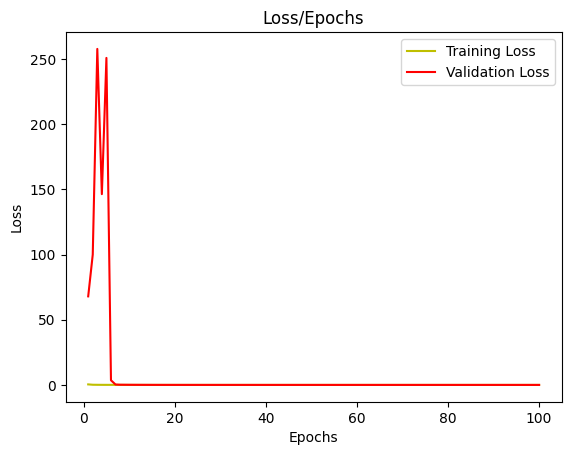

In [133]:
# visualize loss/val_los
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "y", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")

plt.title("Loss/Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

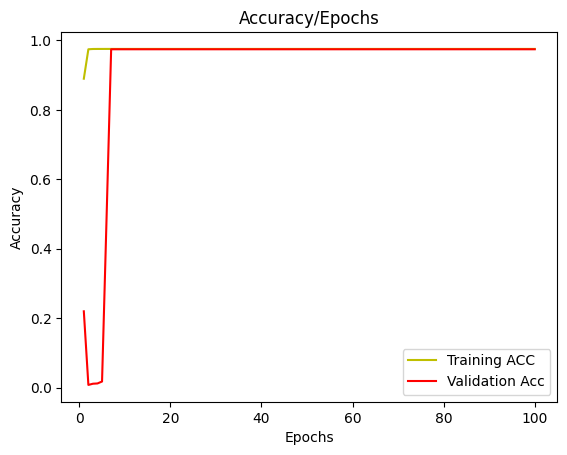

In [134]:
# visualize acc/val_acc
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, "y", label="Training ACC")
plt.plot(epochs, val_acc, "r", label="Validation Acc")

plt.title("Accuracy/Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Prediction (Tespit)

In [135]:
from keras.models import load_model
model = load_model(model_path)

In [136]:
from tensorflow.keras.metrics import MeanIoU

y_prediction = model.predict(X_val)
y_prediction_thresholded = y_prediction > 0.5

1/1 [==============================] - 13s 13s/step


In [137]:
num_classes = 2
IoU = MeanIoU(num_classes=num_classes)
IoU.update_state(y_prediction_thresholded, y_val)
print("Mean IoU: ", IoU.result().numpy())

Mean IoU:  1.0
